In [96]:
##import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

Text(0, 0.5, 'Y dataset')

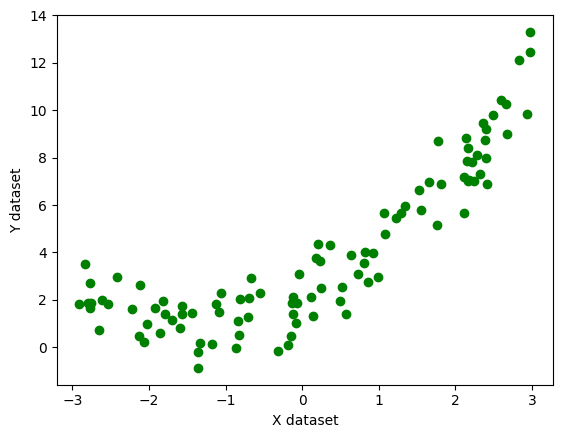

In [97]:
X = 6 * np.random.rand(100, 1) - 3
y =0.5 * X**2 + 1.5*X + 2 + np.random.randn(100, 1)
# quadratic equation used- y=0.5x^2+1.5x+2+outliers
plt.scatter(X,y,color='g')
plt.xlabel('X dataset')
plt.ylabel('Y dataset')

In [98]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [99]:
## Liner Regression
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [100]:
## Calculate the R2 score
from sklearn.metrics import r2_score
y_pred = lin_reg.predict(X_test)
r2_score(y_test, y_pred)

0.7409028424769064

Text(0, 0.5, 'Y dataset')

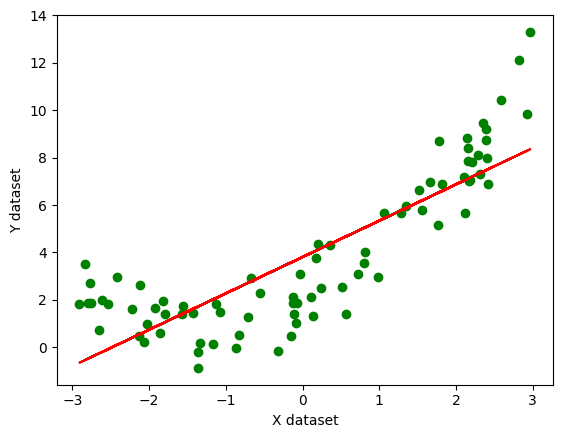

In [101]:
## Plot the graph with the linear regression model
plt.scatter(X_train, y_train, color='g')
plt.plot(X_train, lin_reg.predict(X_train), color='r')
plt.xlabel('X dataset')
plt.ylabel('Y dataset')

In [102]:
## Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=True)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)


In [103]:
## Lets again calculate the R2 score with ploy features
regression = LinearRegression()
regression.fit(X_train_poly, y_train)

y_pred = regression.predict(X_test_poly)
r2_score(y_test, y_pred)

0.9404051546440351

Text(0, 0.5, 'Y dataset')

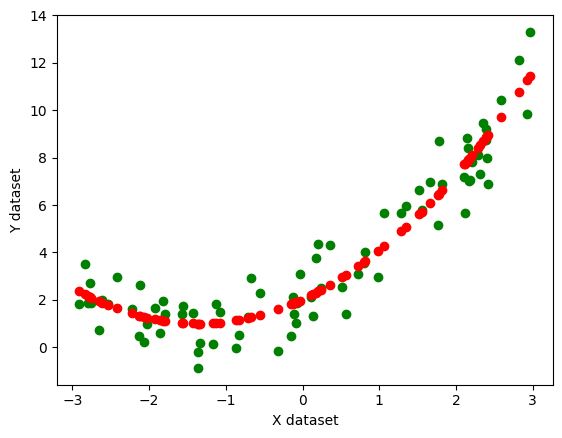

In [104]:
## Plot the graph with the polynomial regression model
plt.scatter(X_train, y_train, color='g')
plt.scatter(X_train, regression.predict(X_train_poly), color='r')
plt.xlabel('X dataset')
plt.ylabel('Y dataset')

In [105]:
## Polynomial Regression with degree 3
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=3, include_bias=True)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

regression = LinearRegression()
regression.fit(X_train_poly, y_train)

y_pred = regression.predict(X_test_poly)
r2_score(y_test, y_pred)

0.9382815998601972

Text(0, 0.5, 'Y dataset')

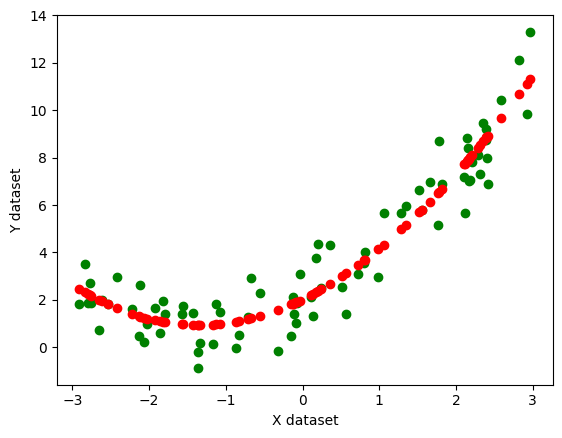

In [106]:
## Plot the graph with the polynomial regression model
plt.scatter(X_train, y_train, color='g')
plt.scatter(X_train, regression.predict(X_train_poly), color='r')
plt.xlabel('X dataset')
plt.ylabel('Y dataset')

0.9382815998601972


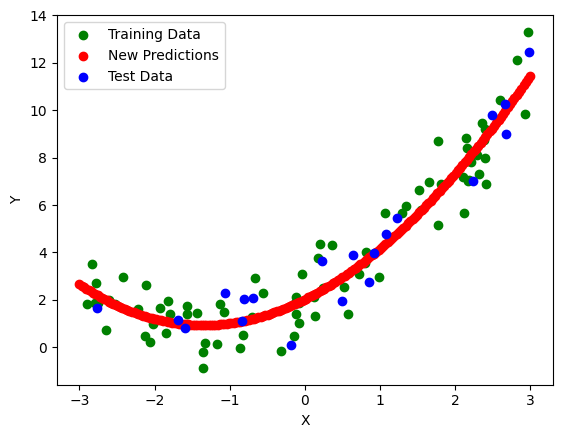

In [107]:
## Prediction of new data
X_new = np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly  = poly_features.transform(X_new)
y_pred_new = regression.predict(X_new_poly)
print(r2_score(y_test, y_pred))

plt.scatter(X_train, y_train, color='g', label='Training Data')
plt.scatter(X_new, y_pred_new, color='r', label='New Predictions')
plt.scatter(X_test, y_test, color='b', label='Test Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()


In [108]:
## Polynomila Regression with Pipeline
from sklearn.pipeline import Pipeline
 
def polynominal_regression(degree):
   
    poly_fetures = PolynomialFeatures(degree=degree, include_bias=True)
    regression = LinearRegression()
    pipeline = Pipeline([
        ("poly_features", poly_fetures),
        ("liner_regression", regression)
    ])
    
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    print("R2 Score with degree {} is {}".format(degree, r2_score(y_test, y_pred)))
    plt.scatter(X_train, y_train, color='g')
    plt.scatter(X_train, pipeline.predict(X_train), color='r')
    plt.xlabel('X dataset')
    plt.ylabel('Y dataset')

In [109]:
## Polynomila Regression with Pipeline
from sklearn.pipeline import Pipeline
 
def polynominal_regression_2(degree,*args):
   
    poly_fetures = PolynomialFeatures(degree=degree, include_bias=True)
    regression = LinearRegression()
    pipeline = Pipeline([
        ("poly_features", poly_fetures),
        ("liner_regression", regression)
    ])
    
    pipeline.fit(args[0], args[1])
    y_pred = pipeline.predict(args[2])
    score =  r2_score(args[3], y_pred)
    
    return y_pred, score, pipeline
    

R2 Score with degree 3 is 0.9382815998601972


Text(0, 0.5, 'Y dataset')

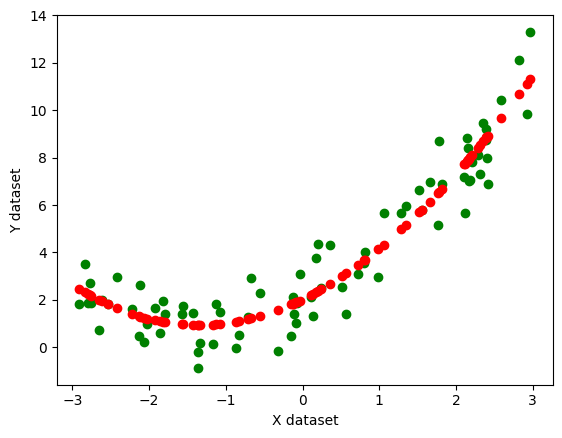

In [110]:
degree = 3
y_pred, score, pipeline = polynominal_regression_2(degree, X_train, y_train, X_test, y_test)
print("R2 Score with degree {} is {}".format(degree, score))
plt.scatter(X_train, y_train, color='g')
plt.scatter(X_train, pipeline.predict(X_train) , color='r')
plt.xlabel('X dataset')
plt.ylabel('Y dataset')

R2 Score with degree 4 is 0.9393567356089481


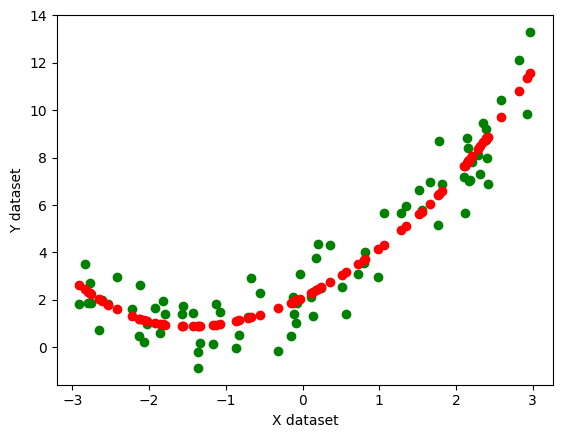

In [111]:
polynominal_regression(4)


R2 Score with degree 5 is 0.9357821942429628


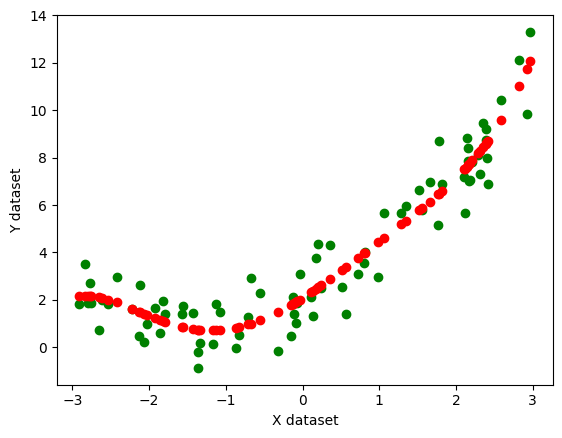

In [112]:
polynominal_regression(5)